Import Py files from Repo

In [3]:
from importlib import reload
from IPython.display import Image

import pandas as pd
pd.set_option('display.max_columns', None)

from QuocAnh_py.others.install_packages import import_or_install_packages
import_or_install_packages()

In [25]:
from QuocAnh_py.execute.init import import_settings

import QuocAnh_py.others.shortcuts as sc
reload(sc)
import QuocAnh_py.others.utilities as ult
reload(ult)

from QuocAnh_py.execute.init import get_df

import QuocAnh_py.dj.best_next_tracks
reload(QuocAnh_py.dj.best_next_tracks)
from QuocAnh_py.dj.best_next_tracks import run_best_next_tracks

import QuocAnh_py.dj.sorting_playlist
reload(QuocAnh_py.dj.sorting_playlist)
from QuocAnh_py.dj.sorting_playlist import sort_playlist

import QuocAnh_py.models.common_text_score
reload(QuocAnh_py.models.common_text_score)
from QuocAnh_py.models.common_text_score import run_common_text_score

import QuocAnh_py.models.harmonic_keys
reload(QuocAnh_py.models.harmonic_keys)
from QuocAnh_py.models.harmonic_keys import run_harmonic_tracks, key_translate

import QuocAnh_py.models.nearest_neighbor
reload(QuocAnh_py.models.nearest_neighbor)
from QuocAnh_py.models.nearest_neighbor import run_nearest_neighbor

import  QuocAnh_py.others.plots as myplts
reload(myplts) 

import QuocAnh_py.spotify.spotify_crawling as spc
from QuocAnh_py.spotify.spotify_playlist_import_export import export_playlist

from QuocAnh_py.spotify.spotify_api import sp

Test Functions

In [5]:
artist = "coldplay"
track_name = "yellow"
album = ""

test_track = spc.get_track_data_from_search(track_name, artist)
print('Get track data from search:')
track_data = spc.get_tracks_data(test_track)
display(track_data)

print('Get artist data from artist id: ')
artist_id = test_track["artists"][0]["id"]
artist_data = spc.get_artist(artist_id)
display(artist_data)

print('Get track audio data from track id: ')
track_id = test_track['id']
audio = sp.audio_features(track_id)
track_audio = spc.get_tracks_audio_features(audio[0])
display(track_audio)

Get track data from search:


{'track_name': 'Yellow',
 'track_id': '3AJwUDP919kvQ9QcozQPxg',
 'artist': 'Coldplay',
 'artist_id': '4gzpq5DPGxSnKTe4SA8HAU',
 'album': 'Parachutes',
 'album_id': '6ZG5lRT77aJ3btmArcykra',
 'album_releasedate': '2000-07-10',
 'track_popularity': 89,
 'duration': 266773}

Get artist data from artist id: 


{'artist': 'Coldplay',
 'arist_id': '4gzpq5DPGxSnKTe4SA8HAU',
 'artist_genres': 'permanent wave | pop',
 'artist_popularity': 84}

Get track audio data from track id: 


{'danceability': 0.429,
 'energy': 0.661,
 'key': 11,
 'loudness': -7.227,
 'mode': 1,
 'speechiness': 0.0281,
 'acousticness': 0.00239,
 'instrumentalness': 0.000121,
 'liveness': 0.234,
 'valence': 0.285,
 'tempo': 173.372,
 'track_id': '3AJwUDP919kvQ9QcozQPxg'}

Import Playlist (Spotify API only allows to pull 99 tracks per playlist)

In [22]:
df = get_df(playlist_import=False) 

Getting the Spotify playlist data from ./data/spotify_playlist_data.csv


Input

In [8]:
search_keyword = "yellow"
found_df = ult.get_data_from_search(search_keyword, "track_name", df)
found_index = found_df.index[0]
display(found_df)


,track_name,artist,artist_id,album,album_id,album_releasedate,track_popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_genres,artist_popularity,playlist_id,playlist_name,playlist_owner,playlist_owner_id,duration_min,translated_key,year_released
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3AJwUDP919kvQ9QcozQPxg,Yellow,Coldplay,4gzpq5DPGxSnKTe4SA8HAU,Parachutes,6ZG5lRT77aJ3btmArcykra,2000-07-10,90,266773,0.429,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.234,0.285,173.372,permanent wave | pop,88,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,4.45,B,2000


Seasborn Pairplot Matrix

Highlighting input indices in the pair plot


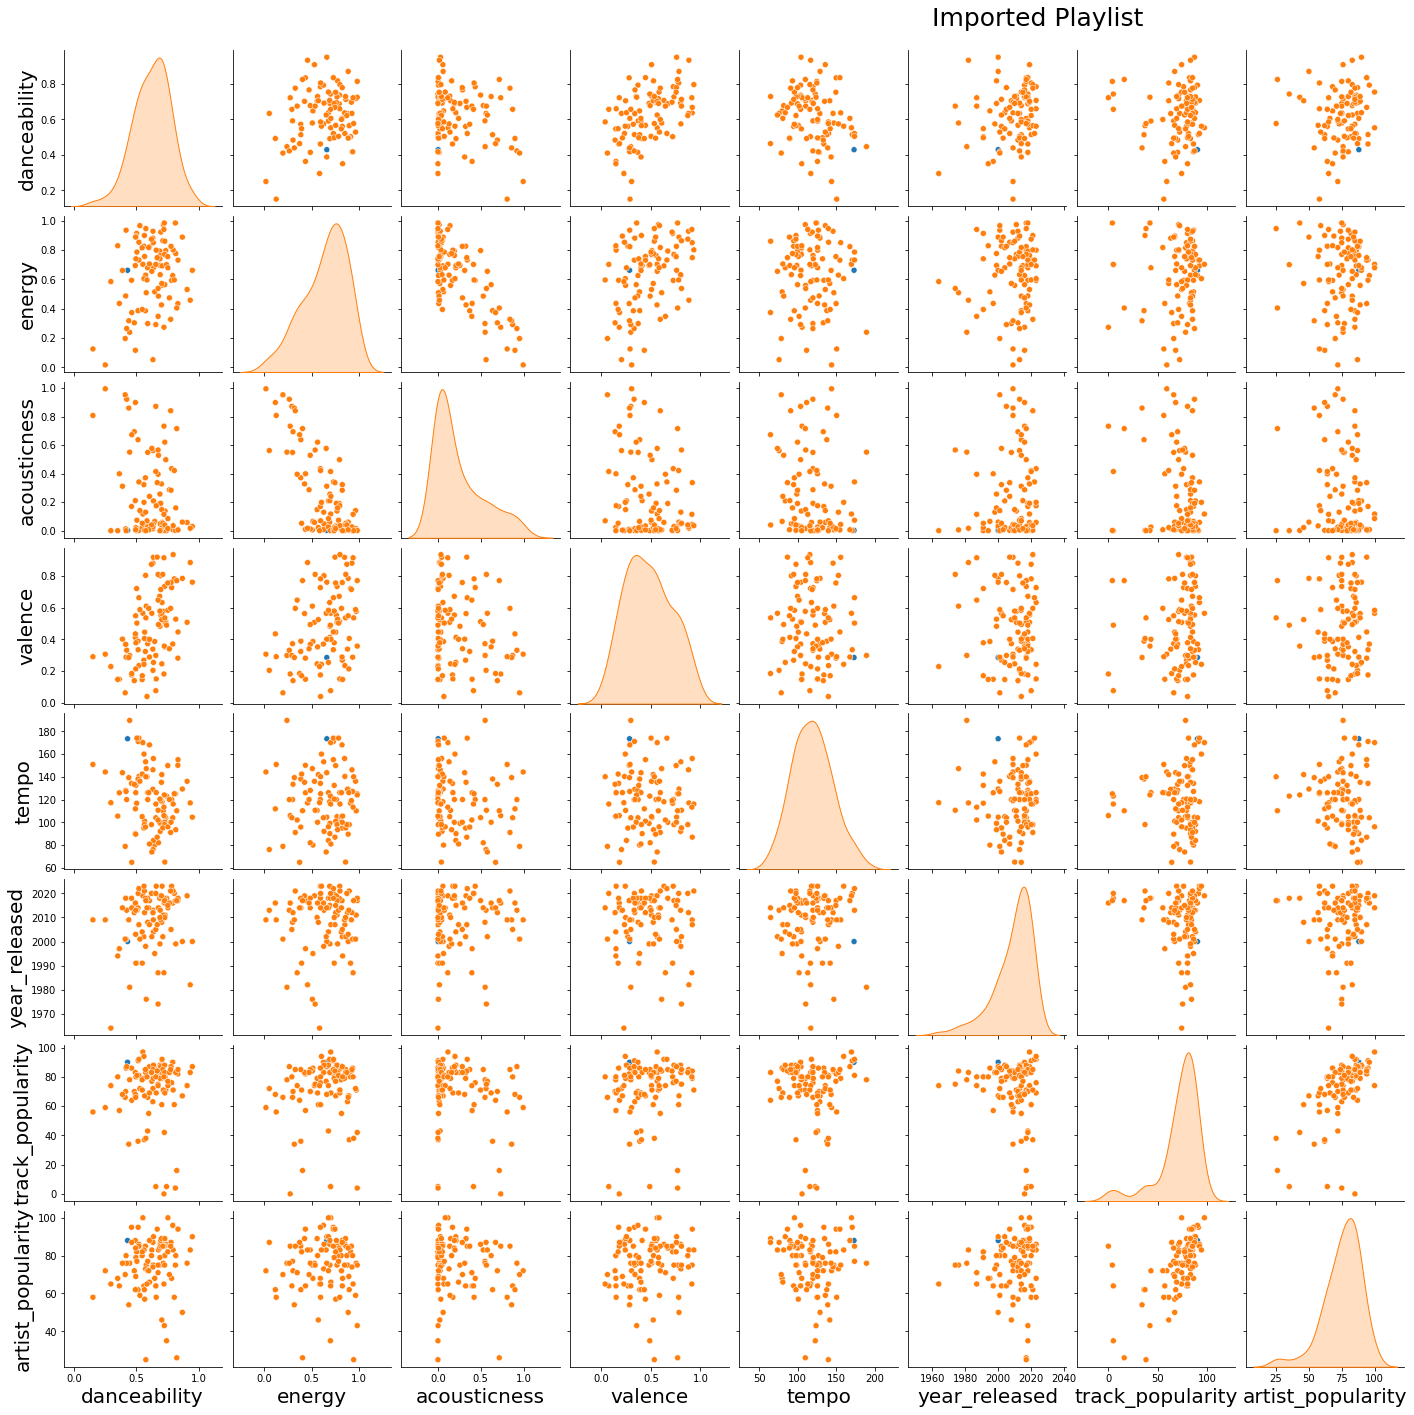

In [9]:
myplts.corre_plot(df, track_id, "Imported Playlist")

<module 'matplotlib.pyplot' from 'C:\\Users\\qaduong\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>

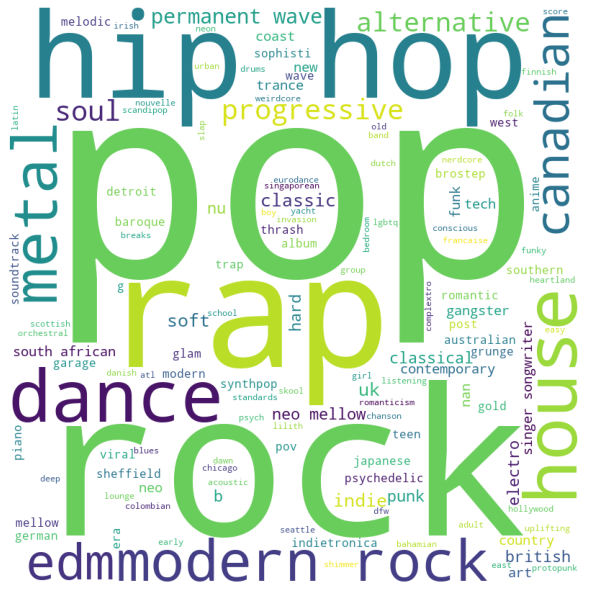

In [26]:
myplts.wordcloud_plot(df['artist_genres'])

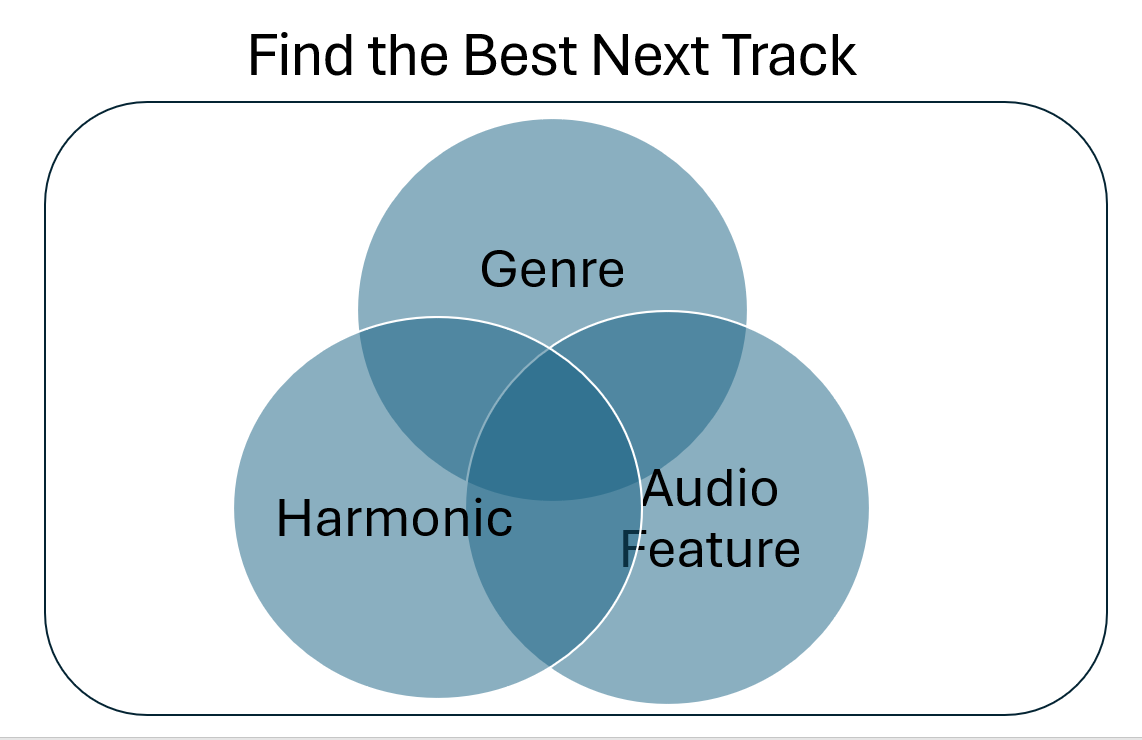

In [10]:
Image(filename='.\\data\\images\\best_next_track1.png')

In [21]:
search_keyword = "rolling in the deep"
found_df = ult.get_data_from_search(search_keyword, "track_name", df)
found_index = found_df.index[0]

common_genres_tracks_test = run_common_text_score(df, found_index, print_add_cols=True)
display(common_genres_tracks_test)

,word_match_score,track_name,artist,artist_genres,translated_key,duration_min,track_popularity,artist_popularity,danceability,energy,acousticness,valence,tempo,year_released
track_id,,,,,,,,,,,,,,
1c8gk2PeTE04A1pIDH9YMk,100.0,Rolling in the Deep,Adele,british soul | pop | pop soul | uk pop,G#,3.80,80,85,0.730,0.7690,0.13800,0.507,104.948,2011
5VwSwu1zeiMGAjwe9nUmzZ,4.0,Million Years Ago,Adele,british soul | pop | pop soul | uk pop,C#m,3.78,0,85,0.721,0.2730,0.73300,0.181,105.846,2016
1fu5IQSRgPxJL2OTP7FVLW,2.5,I See Fire,Ed Sheeran,pop | singer-songwriter pop | uk pop,A#m,5.01,72,87,0.633,0.0519,0.56200,0.204,76.034,2013
3U4isOIWM3VvDubwSI3y7a,2.5,All of Me,John Legend,neo soul | pop | pop soul | urban contemporary,G#,4.49,87,76,0.422,0.2640,0.92200,0.331,119.930,2013
6gpcs5eMhJwax4mIfKDYQk,2.0,Slide (feat. Frank Ocean & Migos),Calvin Harris,dance pop | edm | electro house | house | pop ...,C#m,3.85,71,86,0.736,0.7950,0.49800,0.511,104.066,2017
7795WJLVKJoAyVoOtCWqXN,2.0,I'm Not The Only One,Sam Smith,pop | uk pop,F,3.99,85,83,0.677,0.4850,0.52900,0.493,82.001,2014
09mEdoA6zrmBPgTEN5qXmN,1.5,Call Out My Name,The Weeknd,canadian contemporary r&b | canadian pop | pop,C#,3.81,86,95,0.461,0.5930,0.17000,0.175,134.170,2018
2VxeLyX666F8uXCJ0dZF8B,1.5,Shallow,Lady Gaga,art pop | dance pop | pop,G,3.60,85,85,0.572,0.3850,0.37100,0.323,95.799,2018
7Lf7oSEVdzZqTA0kEDSlS5,1.5,Cry Me a River,Justin Timberlake,dance pop | pop,G#m,4.81,77,83,0.624,0.6540,0.57700,0.564,73.898,2002


Harmonic Keys

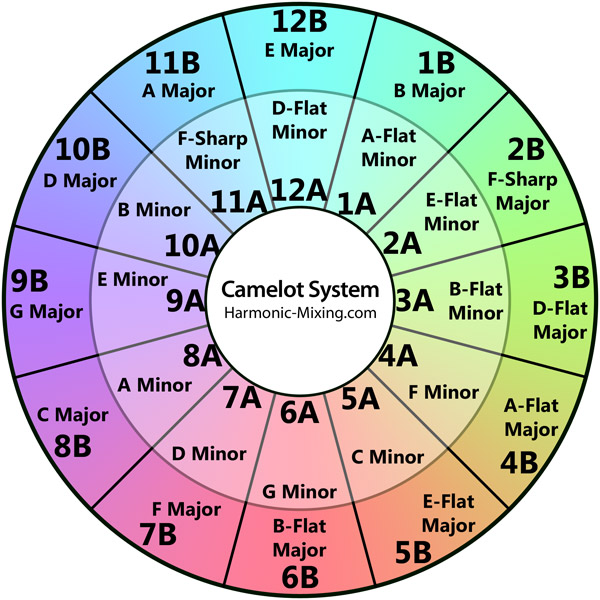

In [12]:
Image(filename='.\\data\\images\\camelot_wheel.png')

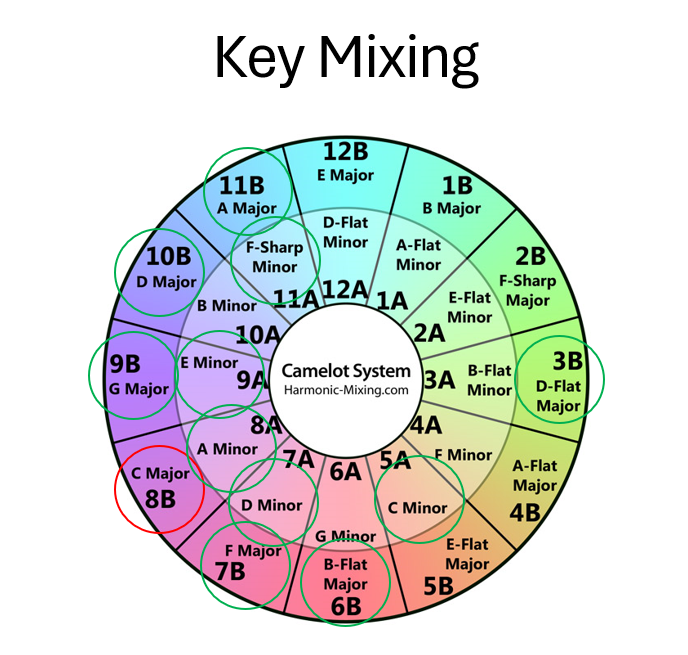

In [ ]:
Image(filename='.\\data\\images\\key_mixing.png')

In [36]:
search_keyword = "flowers"
found_df = ult.get_data_from_search(search_keyword, "track_name", df)
found_index = found_df.index[0]

print(f"The track '{ult.get_data_from_index(df, found_index, 'track_name')}' by '{ult.get_data_from_index(df, found_index, 'artist')}' is in the key '{key_translate(df.loc[found_index,'key'], df.loc[found_index,'mode'])}'. Compatible scales are: ")

harmonic_tracks_test = run_harmonic_tracks(df, found_index, grouped=True, drop_dups_cols=False)
display(harmonic_tracks_test)

The track '['Flowers']' by '['Miley Cyrus']' is in the key 'C'. Compatible scales are: 


,translated_key,track_name,track_id,desc,mood_mvmt,energy_mvmt,translated_mood,translated_energy,camelot_mvmt,mode_compatible,key_compatible
0,C,"[Flowers, Who Let The Dogs Out, Thunder, Mocki...","[7DSAEUvxU8FajXtRloy8M0, 1H5tvpoApNDxvxDexoaAU...",Same scale,0,0,Same mood,Perfectly harmonic,0,1,0
1,Am,"[Für Elise, Escape (feat. Hayla), Avocado, Hou...","[1DfGPEHxTYeaJpiNA4xUb5, 3VpxEo6vMpi4rQ6t2WVVk...",Tonal shift,-1,0,Darken mood,Perfectly harmonic,0,0,9
2,G,"[Bangarang (feat. Sirah), Miracle, Wake Me up ...","[6VRhkROS2SZHGlp0pxndbJ, 2BC8rOrlfw6dkZpbDtkoi...",Up a fifth,0,1,Same mood,Raise energy,1,1,7
3,F,"[I'm Not The Only One, Happier, Handlebars, La...","[7795WJLVKJoAyVoOtCWqXN, 7BqHUALzNBTanL6OvsqmC...",Down a fifth,0,-1,Same mood,Goosebumps,-1,1,5
4,A,"[Cruel Summer, Lose Control, Englishman In New...","[1BxfuPKGuaTgP7aM0Bbdwr, 17phhZDn6oGtzMe56NuWv...",Going down minor third,0,1,Same mood,Raise energy,3,1,9
5,F#m,"[I Want It That Way, High On Life (feat. Bonn)...","[47BBI51FKFwOMlIiX6m8ya, 4ut5G4rgB1ClpMTMfjoIu...",Minor to Major,-1,1,Darken mood,Raise energy,3,0,6
6,Cm,[Hymn for the Weekend],[3RiPr603aXAoi4GHyXx0uy],Parallel Key,-1,-1,Darken mood,Goosebumps,-3,0,0
7,Em,"[Fly Me To The Moon - 2008 Remastered, Nothing...","[7FXj7Qg3YorUxdrzvrcY25, 2CtemffYhT0DJWcT1XW047]",Up Dominant Key of the Relative Major,-1,1,Darken mood,Raise energy,1,0,4
8,Dm,"[Grenade, Careless Whisper, Love Me Again, Cit...","[2tJulUYLDKOg9XrtVkMgcJ, 4jDmJ51x1o9NZB5Nxxc7g...",Down Dominant Key of the Relative Major,-1,-1,Darken mood,Goosebumps,-1,0,2
9,D,"[Hotel California - 2013 Remaster, Mask Off, D...","[40riOy7x9W7GXjyGp4pjAv, 0VgkVdmE4gld66l8iyGjg...",Up whole step,0,1,Same mood,Raise energy,2,1,2


Nearest Neighbor

In [60]:
search_keyword = "flowers"
found_df = ult.get_data_from_search(search_keyword, "track_name", df)
found_index = found_df.index[0]

nn_tracks_test = run_nearest_neighbor(df, found_index, print_input_msg=True, print_add_cols=True)
display(nn_tracks_test)

,nn_score,nn_index_position,track_name,artist,artist_genres,translated_key,duration_min,track_popularity,artist_popularity,danceability,energy,acousticness,valence,tempo,year_released
track_id,,,,,,,,,,,,,,,
7DSAEUvxU8FajXtRloy8M0,0.000000,0,Flowers,Miley Cyrus,pop,C,3.34,92,86,0.706,0.691,0.058400,0.632,118.048,2023
21jGcNKet2qwijlDFuPiPb,0.753032,1,Circles,Post Malone,dfw rap | melodic rap | pop | rap,C,3.59,87,88,0.695,0.762,0.192000,0.553,120.042,2019
3LKDKU5ItvVwLINMQx0TDn,0.842536,2,Tuesday Maybe (ABGT300JD),Way Out West,classic progressive house | nu skool breaks | ...,C,6.50,5,35,0.742,0.699,0.000388,0.489,123.014,2018
7BqHUALzNBTanL6OvsqmC1,1.058624,3,Happier,Marshmello,brostep | edm | pop | progressive electro house,F,3.57,85,84,0.687,0.792,0.191000,0.671,100.011,2018


Best Next Tracks

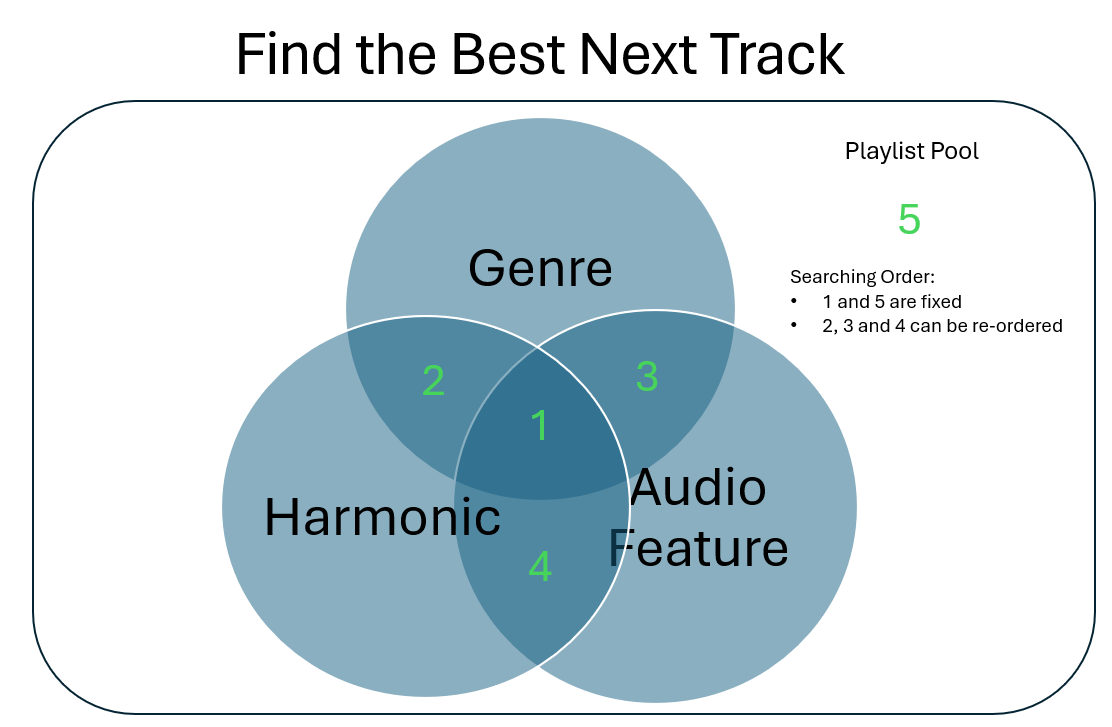

In [46]:
Image(filename='.\\data\\images\\best_next_track2.png')

In [29]:
search_keyword = "flowers"
found_df = ult.get_data_from_search(search_keyword, "track_name", df)
found_index = found_df.index[0]

found_best_next_track = run_best_next_tracks(df, found_index, used_track = [], remove_input_track= False, print_add_cols=True, print_msg=True)
display(found_best_next_track)

Selecting the intersection of all keys: common_text_score|harmonic_keys|nearest_neighbor


,track_name,artist,artist_genres,translated_key,duration_min,track_popularity,artist_popularity,intersection,intersection_num,word_match_score,nn_score,nn_index_position,translated_energy,translated_mood,energy_mvmt,mood_mvmt,camelot_mvmt,desc,danceability,energy,acousticness,valence,tempo
track_id,,,,,,,,,,,,,,,,,,,,,,,
7DSAEUvxU8FajXtRloy8M0,Flowers,Miley Cyrus,pop,C,3.34,92,86,common_text_score|harmonic_keys|nearest_neighbor,3,100.0,0.000000,0.0,Perfectly harmonic,Same mood,0.0,0.0,0.0,Same scale,0.706,0.691,0.0584,0.632,118.048
21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,dfw rap | melodic rap | pop | rap,C,3.59,87,88,common_text_score|harmonic_keys|nearest_neighbor,3,1.0,0.753032,1.0,Perfectly harmonic,Same mood,0.0,0.0,0.0,Same scale,0.695,0.762,0.1920,0.553,120.042
7BqHUALzNBTanL6OvsqmC1,Happier,Marshmello,brostep | edm | pop | progressive electro house,F,3.57,85,84,common_text_score|harmonic_keys|nearest_neighbor,3,1.0,1.058624,3.0,Goosebumps,Same mood,-1.0,0.0,-1.0,Down a fifth,0.687,0.792,0.1910,0.671,100.011


Sort Playlist

In [32]:
my_playlist = sort_playlist(df, found_index, print_msg=True)
display(my_playlist)

Selecting the intersection of all keys: common_text_score|harmonic_keys|nearest_neighbor
Track input 7DSAEUvxU8FajXtRloy8M0, '['Flowers']'
Apply randomization from settings.json
Choosing the best next track by selecting the first index
Searching ['Flowers']'s best next track
Selecting the intersection of all keys: common_text_score|harmonic_keys|nearest_neighbor
Searching ['Happier']'s best next track
Selecting the intersection of all keys: common_text_score|harmonic_keys|nearest_neighbor
Searching ['Circles']'s best next track
The model results from '['Circles']' don't have any intersection besides the input index. Moving on to applying preferred order
Select track from intersection: common_text_score|nearest_neighbor
Searching ['Rolling in the Deep']'s best next track
Selecting the intersection of all keys: common_text_score|harmonic_keys|nearest_neighbor
Searching ['Blank Space']'s best next track
The model results from '['Blank Space']' don't have any intersection besides the input

,track_name,artist,artist_id,album,album_id,album_releasedate,track_popularity,duration,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_genres,artist_popularity,playlist_id,playlist_name,playlist_owner,playlist_owner_id,duration_min,translated_key,year_released,word_match_score,key_compatible,mode_compatible,camelot_mvmt,translated_energy,translated_mood,energy_mvmt,mood_mvmt,desc,nn_score,nn_index_position,intersection,intersection_num,order,cum_duration
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7DSAEUvxU8FajXtRloy8M0,Flowers,Miley Cyrus,5YGY8feqx7naU7z4HrwZM6,Endless Summer Vacation,5DvJgsMLbaR1HmAI6VhfcQ,2023-08-18,92,200600,0.706,0.691,0,-4.775,1,0.0633,0.05840,0.000070,0.0232,0.632,118.048,pop,86,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,3.34,C,2023,100.0,0.0,1.0,0.0,Perfectly harmonic,Same mood,0.0,0.0,Same scale,0.000000,0.0,common_text_score|harmonic_keys|nearest_neighbor,3,0.0,3.34
7BqHUALzNBTanL6OvsqmC1,Happier,Marshmello,64KEffDW9EtZ1y2vBYgq8T,Happier,2u4Yp2ADTKYPwFSBFL4ffa,2018-08-17,85,214289,0.687,0.792,5,-2.749,1,0.0452,0.19100,0.000000,0.1670,0.671,100.011,brostep | edm | pop | progressive electro house,84,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,3.57,F,2018,1.0,5.0,1.0,-1.0,Goosebumps,Same mood,-1.0,0.0,Down a fifth,1.058624,3.0,common_text_score|harmonic_keys|nearest_neighbor,3,1.0,6.91
21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,246dkjvS1zLTtiykXe5h60,Hollywood's Bleeding,4g1ZRSobMefqF6nelkgibi,2019-09-06,87,215280,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,dfw rap | melodic rap | pop | rap,88,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,3.59,C,2019,1.0,0.0,1.0,1.0,Raise energy,Same mood,1.0,0.0,Up a fifth,0.932855,3.0,common_text_score|harmonic_keys|nearest_neighbor,3,2.0,10.50
1c8gk2PeTE04A1pIDH9YMk,Rolling in the Deep,Adele,4dpARuHxo51G3z768sgnrY,21,0Lg1uZvI312TPqxNWShFXL,2011-01-24,80,228093,0.730,0.769,8,-5.114,1,0.0298,0.13800,0.000000,0.0473,0.507,104.948,british soul | pop | pop soul | uk pop,85,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,3.80,G#,2011,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966553,2.0,common_text_score|nearest_neighbor,2,3.0,14.30
1p80LdxRV74UKvL8gnD7ky,Blank Space,Taylor Swift,06HL4z0CvFAxyc27GXpf02,1989,2QJmrSgbdM35R67eoGQo4j,2014-10-27,74,231826,0.753,0.678,5,-5.421,1,0.0644,0.08500,0.000002,0.1300,0.583,96.006,pop,100,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,3.86,F,2014,1.0,5.0,1.0,3.0,Raise energy,Same mood,1.0,0.0,Going down minor third,0.707183,1.0,common_text_score|harmonic_keys|nearest_neighbor,3,4.0,18.16
086myS9r57YsLbJpU0TgK9,Why'd You Only Call Me When You're High?,Arctic Monkeys,7Ln80lUS6He07XvHI8qqHH,AM,78bpIziExqiI9qztvNFlQu,2013-09-09,88,161123,0.691,0.631,2,-6.478,1,0.0368,0.04830,0.000011,0.1040,0.800,92.004,garage rock | modern rock | permanent wave | r...,86,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,2.69,D,2013,NaN,2.0,1.0,3.0,Raise energy,Same mood,1.0,0.0,Going down minor third,1.059867,2.0,harmonic_keys|nearest_neighbor,2,5.0,20.85
5hM5arv9KDbCHS0k9uqwjr,Borderline,Tame Impala,5INjqkS1o8h1imAzPqGZBb,The Slow Rush,31qVWUdRrlb8thMvts0yYL,2020-02-14,83,237800,0.621,0.873,5,-3.067,0,0.0369,0.04060,0.000009,0.0824,0.873,97.960,australian psych | modern rock | neo-psychedel...,80,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,3.96,Fm,2020,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.339305,2.0,common_text_score|nearest_neighbor,2,6.0,24.81
7rglLriMNBPAyuJOMGwi39,Cold Heart - PNAU Remix,Elton John,3PhoLpVuITZKcymswpck5b,The Lockdown Sessions,7wHczdY0ek3FHnfVhk10om,2021-10-22,71,202735,0.795,0.800,1,-6.320,1,0.0309,0.03540,0.000073,0.0915,0.934,116.032,glam rock | mellow gold | piano rock | rock,83,2N9pjdn0Bpl39UzB7WqQHZ,Test Playlist,Quoc-Anh Duong,1214868237,3.38,C#,2021,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.401644,2.0,common_text_score|nearest

Plot Playlist

In [37]:
myplts.plot_my_playlist(my_playlist, "My Awesome Mixtape vol.1")

<module 'matplotlib.pyplot' from 'C:\\Users\\qaduong\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>

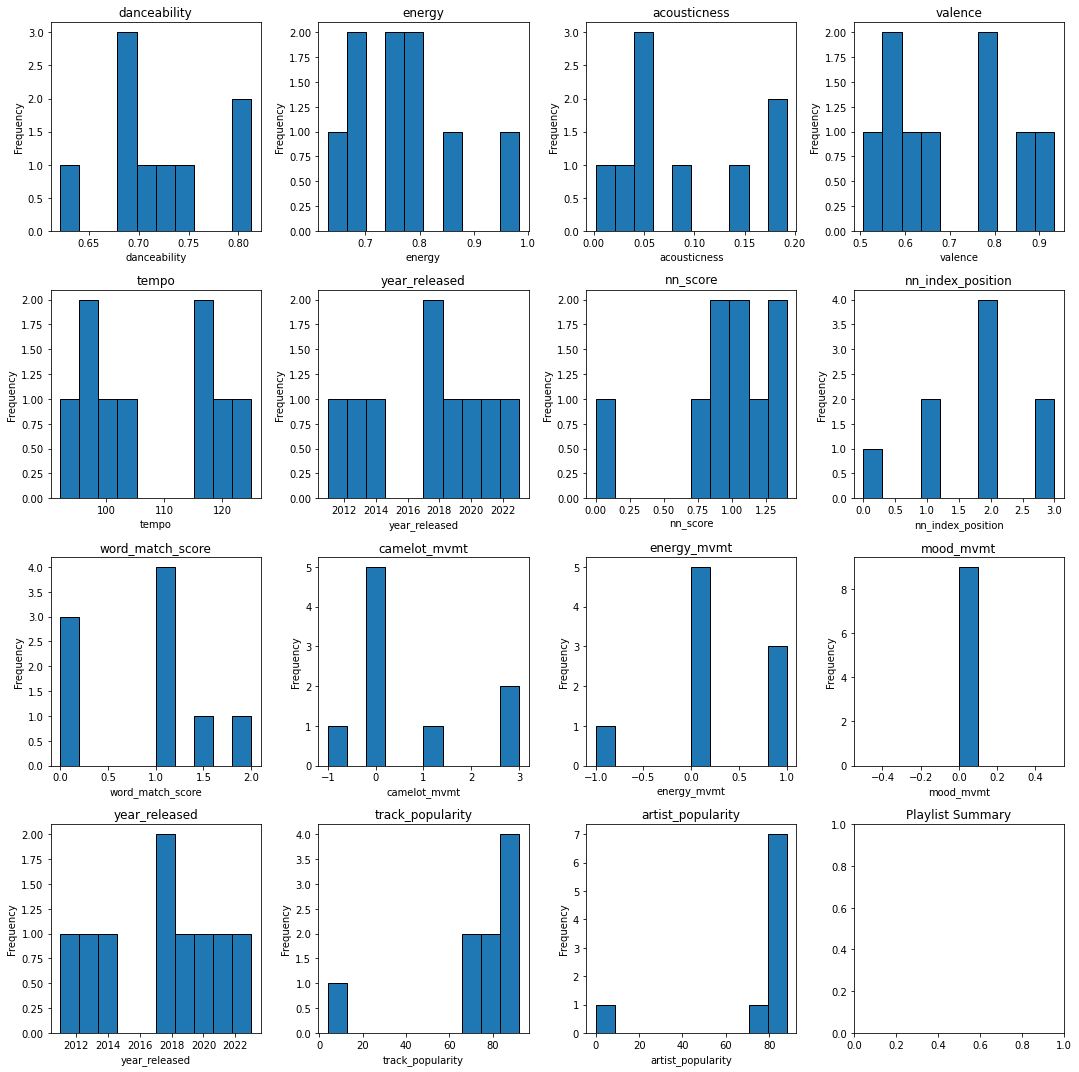

In [34]:
myplts.playlist_summary(my_playlist)

<module 'matplotlib.pyplot' from 'C:\\Users\\qaduong\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>

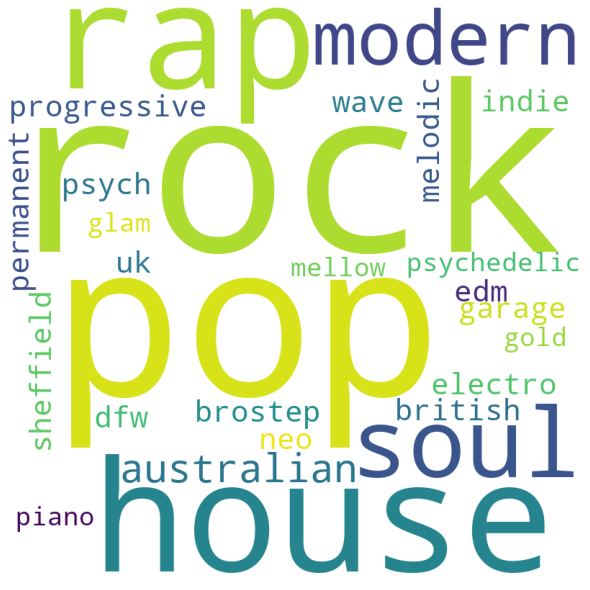

In [35]:
myplts.wordcloud_plot(my_playlist['artist_genres'])

Create Playlist

In [36]:
export_playlist("Quoc-Anh's awesome mixtape vol.1", my_playlist.index.tolist())

Playlist Quoc-Anh's awesome mixtape vol.1 is created successfully!
